# NAME - Sanyam Goel

# GRIP @The Sparks Foundation

# Task 1- Prediction Using Supervised ML

In [52]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

Reading Data

In [53]:
# Reading data from the given link
data_set=pd.read_csv("http://bit.ly/w-data")
print(data_set)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [54]:
data_set.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [55]:
#checking for null values in the dataset
data_set.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [56]:
#there are no null values in the given dataset

Data Visualization

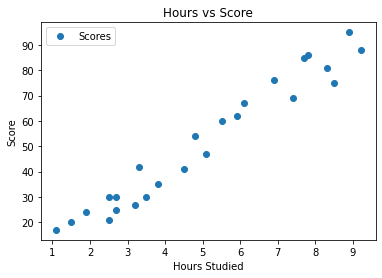

In [57]:
# Plotting the distribution of scores on a scatter plot
data_set.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Score')  
plt.show()

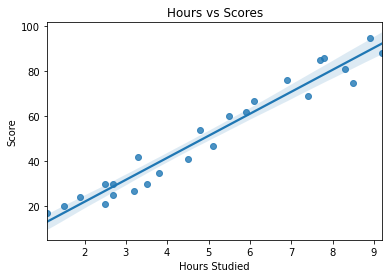

In [58]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data_set['Hours'],y=data_set['Scores'],data=data_set)
plt.title('Hours vs Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Score')
plt.show()

In [59]:
#from above graph we know that there is a linear regression between the Scores and No. of Hours Studied

In [60]:
#preparing data in form of arrays
A = data_set.iloc[:, :-1].values  
B = data_set.iloc[:, 1].values

Training Linear Regression Model

In [61]:
#splitting data into test and train data
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [62]:
#training a linear regression model from data splitted
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(A_train.reshape(-1,1), B_train) 
print("Data Trained")

Data Trained


Plotting Regression Line

In [63]:
# Plotting the regression line
line = regressor.coef_*A+regressor.intercept_

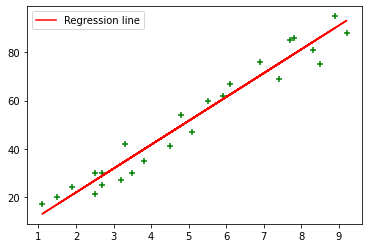

In [64]:
# Plotting for the test data
plt.scatter(A, B, color='green', marker='+')
plt.plot(A, line,color='red', label='Regression line')
plt.legend()
plt.show()

Comparing Actual result to the Predicted Model result

In [65]:
# Data Testing from the test data
print(A_test)
# Model Prediction 
B_pred = regressor.predict(A_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [66]:
# Comparing Actual vs Predicted data
df = pd.DataFrame({'Actual': B_test, 'Predicted': B_pred}) 
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [67]:
#Estimating training and test score to know the accuracy of our model
print("Training Score:",regressor.score(A_train,B_train))
print("Test Score:",regressor.score(A_test,B_test))


Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


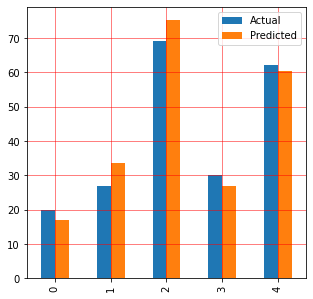

In [68]:
# Plotting the Bar graph to depict the difference between the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5', color='red')
plt.grid(which='minor', linewidth='0.5', color='blue')
plt.show()

Predicting score for 9.5hrs of study

In [69]:
# Testing the model with any random data given in the task question,i.e., hours=9.5
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Model Evaluation

In [70]:
#evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(B_test, B_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(B_test, B_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(B_test, B_pred)))
print('R-2:', metrics.r2_score(B_test, B_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356


In [71]:
#R-squared gives the goodness of the fit and as can be seen it is 94.54% which is really good.
#This means that the algorithm has proven to be good for the given data.
#It can also be said that the model's accuracy is 94.54%